<a href="https://colab.research.google.com/github/Matthew0077/Introducing-Generative-AI-for-the-Humanities/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW6_程式練習 (III)

這是一個關於現代奧運會的歷史資料集，包含從1896年雅典到2016年里約的所有賽事。[資料來源](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

> **請注意**：直到1992年，夏季和冬季運動會是在同一年舉行的。之後它們就分開，冬季運動會在1994年開始，然後夏季運動會在1996年，再然後是冬季運動會在1998年，以此類推。分析這些數據時，人們常犯的一個錯誤是假設夏季和冬季運動會一直都是分開的。

### 內容
資料集 `athlete_events.csv` 包含271116個橫列和15個直欄。每個橫列對應一位運動員參加一個奧運賽事。這些直欄包括：

- ID - 每個運動員的唯一編號
- Name - 運動員的名字
- Sex - 男（M）或女（F）
- Age - 年齡（整數）
- Height - 身高（以厘米為單位）
- Weight - 體重（以千克為單位）
- Team - 隊伍名稱
- NOC - 國家奧林匹克委員會的3個字母代碼
- Games - 奧運年份和賽季
- Year - 奧運年份（整數）
- Season - 奧運賽季（夏季或冬季）
- City - 主辦城市
- Sport - 運動項目
- Event - 賽事
- Medal - 獲得的獎牌（金牌、銀牌、銅牌或NA）

## 題目一：依運動項目填補缺失值 (25%)


### 📄 題目描述：

本資料集中記錄了歷年奧運運動員的基本資訊，包括身高（`Height`）與體重（`Weight`）。由於有部分資料缺失，請你嘗試根據**相同運動項目（`Sport`）**的平均身高與體重，來填補這些缺失值。

---

### ✅ 任務要求：
  1. 讀取資料集，將資料集存放在 `oly_df` 中並列印出來。
  2. 針對資料中的 `Height` 和 `Weight` 欄位進行缺失值填補。
  3. 填補方式為：
   - 依據每個 `Sport` 的非缺失資料，分別計算 `Height` 與 `Weight` 的**平均值**。
   - 將該運動項目中缺失的 `Height` 和 `Weight` 欄位，使用對應的平均值進行填補。
  4. 如果某一個運動項目中，所有選手的 `Height` 或 `Weight` 值都是缺失的，請**略過此運動項目**，**不要嘗試填補**。
  5. 請輸出以下資訊：
   - 每個 `Sport` 對應的 `Height` 與 `Weight` 平均值。
   - 補值後，`Height` 欄位中仍為缺失值的資料筆數
   - 補值後，`Weight` 欄位中仍為缺失值的資料筆數

In [ ]:
### 非台大學生請執行以下程式碼獲取資料集 ###

!gdown 1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn

### 非台大學生請執行以上程式碼獲取資料集 ###

Downloading...
From: https://drive.google.com/uc?id=1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn
To: /content/athlete_events.csv
100% 41.5M/41.5M [00:00<00:00, 68.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
oly_df = pd.read_csv("athlete_events.csv")
oly_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# 計算每個 Sport 的 Height 與 Weight 平均值（排除缺失值）
sport_means = oly_df.groupby("Sport")[["Height", "Weight"]].mean().dropna()

# 建立填補函數
def fill_missing_by_sport(row):
    if pd.isna(row["Height"]) and row["Sport"] in sport_means.index:
        row["Height"] = sport_means.loc[row["Sport"], "Height"]
    if pd.isna(row["Weight"]) and row["Sport"] in sport_means.index:
        row["Weight"] = sport_means.loc[row["Sport"], "Weight"]
    return row

# 填補缺失值
oly_df = oly_df.apply(fill_missing_by_sport, axis=1)

# 計算填補後的缺失值數量
missing_height_after = oly_df["Height"].isna().sum()
missing_weight_after = oly_df["Weight"].isna().sum()
missing_height_after, missing_weight_after
# 顯示每個 Sport 的平均身高與體重（前 20 筆）
print(sport_means.head(20))

# 顯示缺失值的最終結果
print("\n補值後仍有缺失值的筆數：")
print(f"缺失身高 Height：{missing_height_after}")
print(f"缺失體重 Weight：{missing_weight_after}")


                          Height     Weight
Sport                                      
Alpine Skiing         173.489052  72.068110
Archery               173.203085  70.011135
Art Competitions      174.644068  75.290909
Athletics             176.256268  69.249287
Badminton             174.178803  68.171439
Baseball              182.599291  85.707792
Basketball            190.869879  85.777053
Beach Volleyball      186.144954  79.089219
Biathlon              174.034766  66.631419
Bobsleigh             181.437500  89.250678
Boxing                172.825688  65.249890
Canoeing              178.539568  76.492615
Cross Country Skiing  173.249185  65.877670
Curling               174.203125  72.131707
Cycling               176.108826  70.067944
Diving                166.634264  60.572741
Equestrianism         174.375272  67.803975
Fencing               177.164177  71.387538
Figure Skating        168.202160  59.543651
Football              175.402195  70.446834

補值後仍有缺失值的筆數：
缺失身高 Height：209
缺失

## 題目二：統計各國獎牌數量（25%）

### 📄 題目描述：

本資料集中包含了運動員參加比賽的紀錄，其中 `Medal` 欄位記錄了選手是否獲得獎牌（金、銀、銅），`NOC` 欄位表示國家或地區的代碼（例如 USA、CHN、JPN 等）。

請你統計出**每個國家**獲得的金牌、銀牌、銅牌，以及總獎牌數，並依據總獎牌數進行排序（由高至低）。

---

### ✅ 任務要求：

1. 以 `NOC` 為單位，統計該國獲得的：
   - 金牌（`Medal == "Gold"`）
   - 銀牌（`Medal == "Silver"`）
   - 銅牌（`Medal == "Bronze"`）
2. 計算總獎牌數（上述三者加總）
3. 將結果依照總獎牌數 `Total` 欄位由高至低排序。
4. 輸出結果需包含以下欄位：
   - `NOC`
   - `Gold`
   - `Silver`
   - `Bronze`
   - `Total`

In [ ]:
# 根據 Medal 欄位統計各國的金銀銅牌數
medal_counts = oly_df[oly_df["Medal"].notna()].groupby(["NOC", "Medal"]).size().unstack(fill_value=0)

# 確保每種 Medal 欄位都存在
for medal in ["Gold", "Silver", "Bronze"]:
    if medal not in medal_counts.columns:
        medal_counts[medal] = 0

# 計算總獎牌數
medal_counts["Total"] = medal_counts["Gold"] + medal_counts["Silver"] + medal_counts["Bronze"]

# 重設索引並排序
medal_counts = medal_counts.reset_index()
medal_counts_sorted = medal_counts.sort_values(by="Total", ascending=False)
medal_counts_sorted.head(10)

print("各國獎牌統計（依總數排序前 20）：")
print(medal_counts_sorted.head(20))

各國獎牌統計（依總數排序前 20）：
Medal  NOC  Bronze  Gold  Silver  Total
141    USA    1358  2638    1641   5637
139    URS     689  1082     732   2503
49     GER     746   745     674   2165
46     GBR     651   678     739   2068
43     FRA     666   501     610   1777
67     ITA     531   575     531   1637
123    SWE     535   479     522   1536
20     CAN     451   463     438   1352
6      AUS     517   348     455   1320
112    RUS     408   390     367   1165
57     HUN     371   432     332   1135
94     NED     413   287     340   1040
98     NOR     294   378     361   1033
47     GDR     281   397     327   1005
22     CHN     292   350     347    989
70     JPN     357   247     309    913
42     FIN     432   198     270    900
120    SUI     268   175     248    691
110    ROU     292   161     200    653
74     KOR     185   221     232    638


## 題目三：找出參賽人數最多的運動項目（25%）

### ✅ 任務要求：

1. 資料預處理：
  - 移除重複的參賽者紀錄（提示：可使用 `ID`、`Year` 和 `Sport` 這三個欄位進行 `drop_duplicates()`）。

2. 資料切分：
  - 分別取出夏季奧運與冬季奧運的資料。

4. 分別計算：
  - 夏季奧運中，參賽人數最多的前 5 個運動項目
  - 冬季奧運中，參賽人數最多的前 5 個運動項目

5. 請印出這兩組熱門運動項目的名稱及對應人數

In [ ]:
# 移除重複的參賽者紀錄（以 ID、Year 和 Sport 為唯一辨識）
oly_unique = oly_df.drop_duplicates(subset=["ID", "Year", "Sport"])

# 切分資料
summer_df = oly_unique[oly_unique["Season"] == "Summer"]
winter_df = oly_unique[oly_unique["Season"] == "Winter"]

# 分別統計夏季與冬季參賽人數最多的前 5 個運動項目
top5_summer_sports = summer_df["Sport"].value_counts().head(5)
top5_winter_sports = winter_df["Sport"].value_counts().head(5)
top5_summer_sports, top5_winter_sports

(Sport
 Athletics    30536
 Swimming     11935
 Rowing       10223
 Cycling       7540
 Shooting      7471
 Name: count, dtype: int64,
 Sport
 Ice Hockey              5456
 Alpine Skiing           4120
 Cross Country Skiing    3731
 Speed Skating           2544
 Bobsleigh               2345
 Name: count, dtype: int64)

## 題目四：畫出熱門運動項目的參與變化圖（25%）

### ✅ 任務要求：

1. 承上題，將上述統計結果畫成兩張堆疊長條圖（stacked bar chart）：
  - 圖一：夏季奧運熱門運動項目變化圖。
  - 圖二：冬季奧運熱門運動項目變化圖。


2. 視覺化要求：
  - `x` 軸為 `Year`，`y` 軸為 `No. of People Participated in Sport`
  - 每個堆疊的顏色區塊代表一個熱門運動項目
  - 圖片大小為 `(15, 6)`
  - 請為每張圖加上適當的標題，如：
    - `"Top 5 Sports Participation - Summer Olympics"`
    - `"Top 5 Sports Participation - Winter Olympics"`
  - 圖中應包含圖例（Legend），標示每種運動所代表的顏色



<Figure size 1500x600 with 0 Axes>

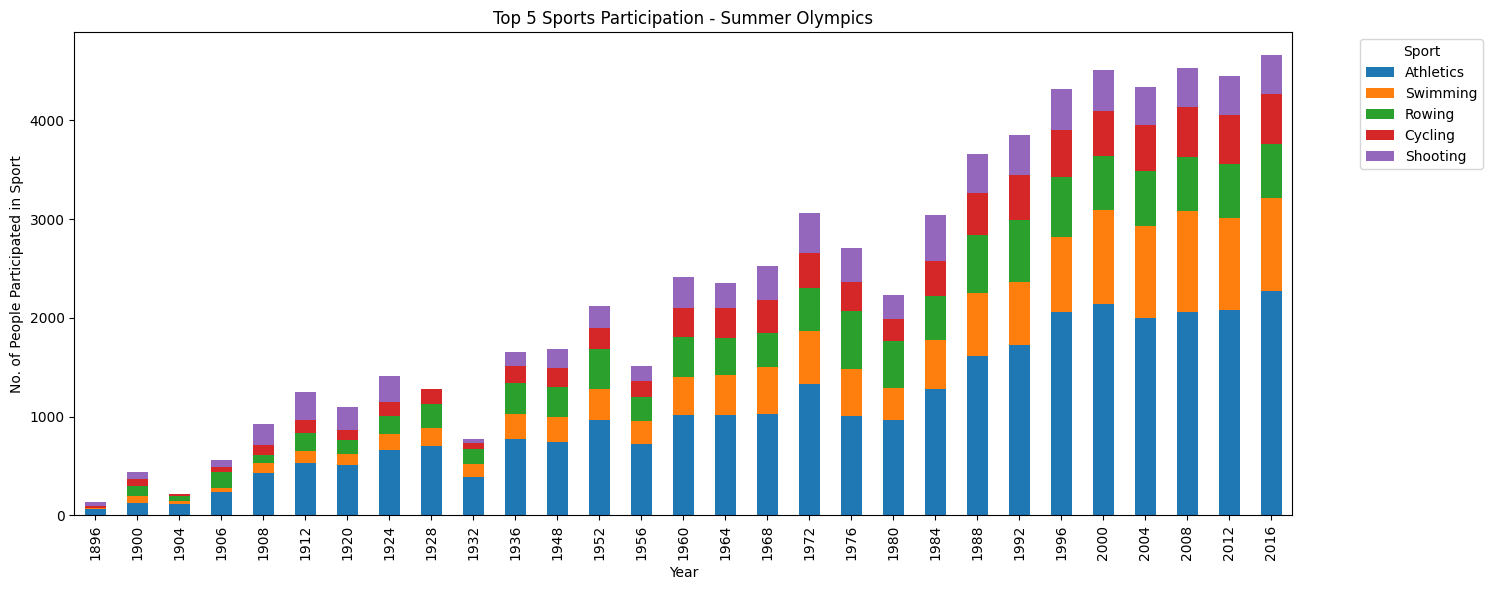

<Figure size 1500x600 with 0 Axes>

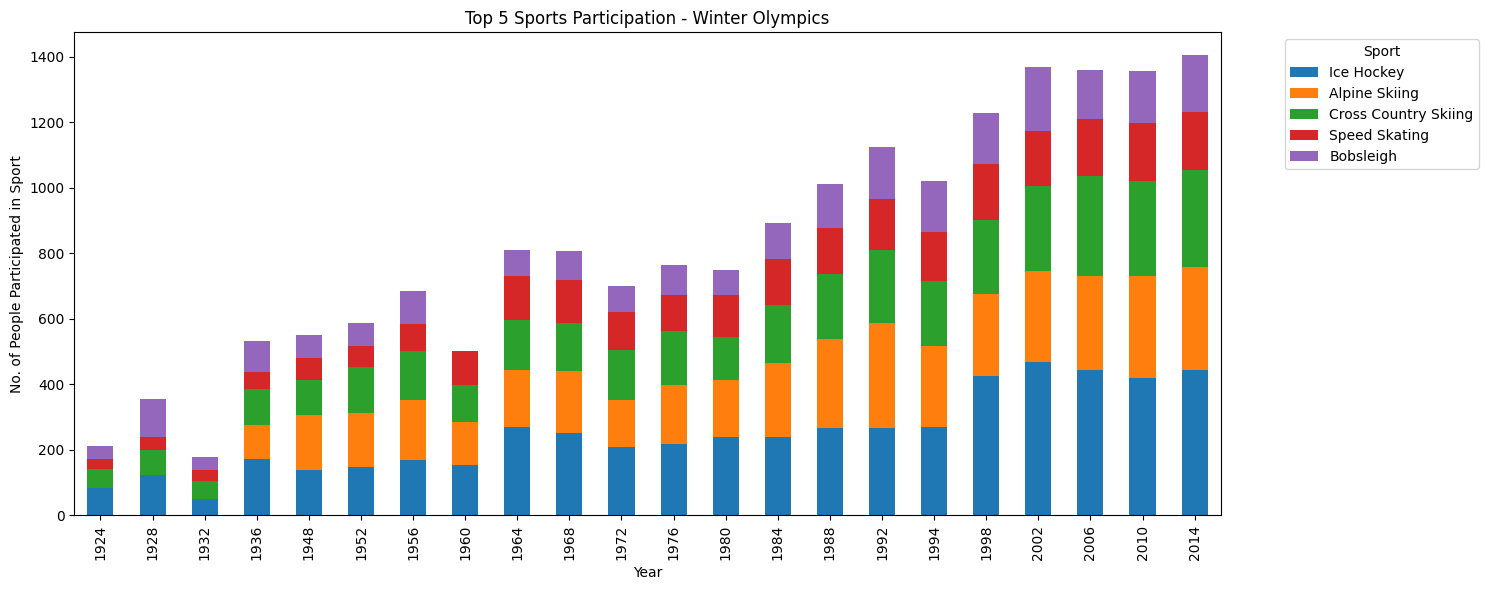

In [ ]:
# 找出夏季與冬季前五名運動項目名稱
top5_summer_names = top5_summer_sports.index.tolist()
top5_winter_names = top5_winter_sports.index.tolist()

# 過濾出資料並統計每年每運動項目的參與人數
summer_filtered = summer_df[summer_df["Sport"].isin(top5_summer_names)]
winter_filtered = winter_df[winter_df["Sport"].isin(top5_winter_names)]

# 製作 summer 與 winter 的透視表
summer_pivot = summer_filtered.pivot_table(index="Year", columns="Sport", values="ID", aggfunc="count", fill_value=0)
winter_pivot = winter_filtered.pivot_table(index="Year", columns="Sport", values="ID", aggfunc="count", fill_value=0)

# 畫出夏季奧運的堆疊長條圖
plt.figure(figsize=(15, 6))
summer_pivot[top5_summer_names].plot(kind="bar", stacked=True, figsize=(15, 6))
plt.title("Top 5 Sports Participation - Summer Olympics")
plt.xlabel("Year")
plt.ylabel("No. of People Participated in Sport")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 畫出冬季奧運的堆疊長條圖
plt.figure(figsize=(15, 6))
winter_pivot[top5_winter_names].plot(kind="bar", stacked=True, figsize=(15, 6))
plt.title("Top 5 Sports Participation - Winter Olympics")
plt.xlabel("Year")
plt.ylabel("No. of People Participated in Sport")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()